<a href="https://colab.research.google.com/github/OviedoMarco/INFERENCIA_ESTADISTICA/blob/main/APOYO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/gdrive")


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# cargamos librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_excel('/gdrive/MyDrive/real_estate_db.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39030 entries, 0 to 39029
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          39030 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     39030 non-null  int64  
 3   COUNTYID                     39030 non-null  int64  
 4   STATEID                      39030 non-null  int64  
 5   state                        39030 non-null  object 
 6   state_ab                     39030 non-null  object 
 7   city                         39030 non-null  object 
 8   place                        39030 non-null  object 
 9   type                         39030 non-null  object 
 10  primary                      39030 non-null  object 
 11  zip_code                     39030 non-null  int64  
 12  area_code                    39030 non-null  int64  
 13  lat             

In [ ]:
plt.style.use('bmh')
# null values
df.isnull().sum().sort_values(ascending=False)

BLOCKID             39030
hc_samples            890
hc_sample_weight      890
hc_mean               890
hc_median             890
                    ...  
AWater                  0
pop                     0
male_pop                0
female_pop              0
UID                     0
Length: 80, dtype: int64

count    38728.000000
mean        40.257491
std          5.876502
min         15.360240
25%         36.832685
50%         40.320550
75%         43.548502
max         90.107940
Name: female_age_mean, dtype: float64


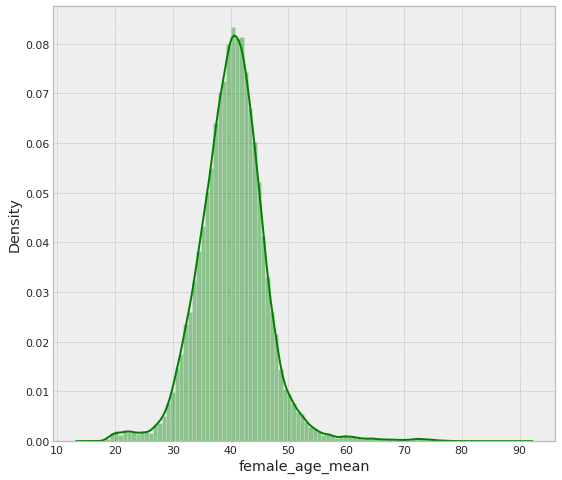

In [ ]:
print(df['female_age_mean'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['female_age_mean'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    38568.000000
mean      1054.833464
std        436.563561
min        117.150000
25%        742.681383
50%        952.974090
75%       1259.884993
max       3962.342290
Name: rent_mean, dtype: float64


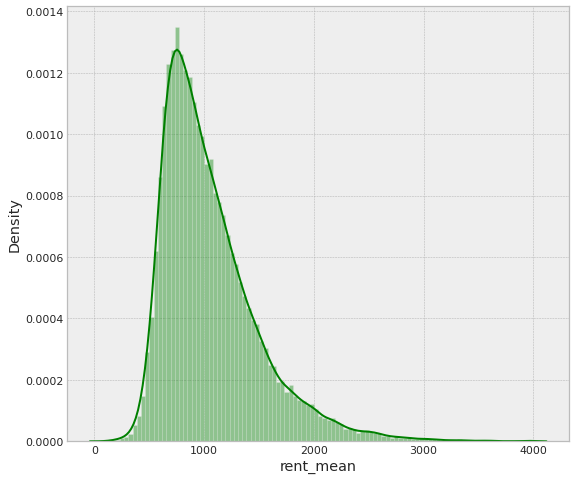

In [ ]:
print(df['rent_mean'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['rent_mean'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,220336,NaN,140,16,2,99685,907,53.621091,-166.770979,2823180154,3101986247,4619,2725,1894,1366.24657,1405.0,650.16380,131.50967,372.0,0.85676,0.65676,0.47838,0.35405,0.28108,0.21081,0.15135,0.12432,661,370,107394.63092,92807.0,70691.05352,329.85389,874.0,114330.20465,101229.0,63955.77136,161.15239,519.0,2266.22562,2283.0,768.53497,41.65644,155.0,840.67205,776.0,341.85580,58.0,29.74375,0.00469,0.01408,0.02817,0.72770,0.50216,0.77143,0.30304,0.82841,0.82784,0.82940,38.45838,39.25000,17.65453,709.06255,2725.0,32.78177,31.91667,19.31875,440.46429,1894.0,0.25053,0.47388,0.30134,0.03443,0.09802
1,220342,NaN,140,20,2,99577,907,61.174250,-149.284329,509234898,1859309,3727,1780,1947,2347.69441,2351.0,382.73576,4.32064,44.0,0.79545,0.56818,0.56818,0.45455,0.20455,0.20455,0.20455,0.00000,50,44,136547.39117,119141.0,84268.79529,288.40934,1103.0,148641.70829,143026.0,69628.72286,159.20875,836.0,2485.10777,2306.0,919.76234,180.92883,797.0,712.33066,742.0,336.98847,256.0,159.32270,0.03609,0.06078,0.07407,0.75689,0.15520,0.56228,0.23925,0.94090,0.97253,0.91503,37.26216,39.33333,19.66765,503.83410,1780.0,38.97956,39.66667,20.05513,466.65478,1947.0,0.94989,0.52381,0.01777,0.00782,0.13575
2,220343,NaN,140,20,2,99505,907,61.284745,-149.653973,270593047,66534601,8736,5166,3570,2071.30766,2089.0,442.89099,195.07816,1749.0,0.99469,0.97403,0.92680,0.89020,0.73022,0.62574,0.54368,0.32999,1933,1694,69361.23167,57976.0,45054.38537,1104.22753,1955.0,67678.50158,58248.0,38155.76319,1023.98149,1858.0,NaN,NaN,NaN,NaN,NaN,525.89101,810.0,392.27170,22.0,10.83444,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.99097,0.99661,0.98408,21.96291,22.25000,11.09657,1734.05720,5166.0,22.20427,23.16667,13.86575,887.67805,3570.0,0.00759,0.50459,0.06676,0.01000,0.01838
3,220345,NaN,140,20,2,99501,907,61.229560,-149.893037,2371512,9966854,1941,892,1049,943.79086,914.0,308.34101,396.51652,720.0,0.97046,0.81435,0.67651,0.58509,0.39381,0.32208,0.27286,0.20253,723,711,66790.89936,48230.0,59069.63484,562.35527,902.0,78660.39446,52606.0,61242.79596,227.29223,390.0,2289.79186,2359.0,697.02686,34.96584,140.0,491.86501,558.0,187.02879,39.0,24.35354,0.00000,0.00000,0.04469,0.78212,1.00000,0.69931,0.18899,0.89274,0.94301,0.84871,35.81912,34.00000,22.03023,213.71499,892.0,37.00750,34.00000,22.06347,281.49420,1049.0,0.20247,0.44428,0.05933,0.00000,0.21563
4,220347,NaN,140,20,2,99504,907,61.217082,-149.767214,1979230,0,5981,3076,2905,1372.84472,1222.0,541.82102,251.53249,878.0,0.97836,0.90319,0.80068,0.66856,0.45900,0.34738,0.24829,0.11276,914,878,76752.81635,66459.0,53486.53205,1015.66547,2065.0,80981.17730,67470.0,53414.82667,623.26325,1290.0,1904.16410,1678.0,773.34778,224.18105,774.0,681.80199,717.0,189.79830,377.0,203.26263,0.04083,0.04083,0.08514,0.67246,0.26136,0.50952,0.43422,0.95351,0.96060,0.94669,34.13110,30.16667,21.32335,802.26386,3076.0,34.96611,31.75000,20.49887,655.98066,2905.0,0.56936,0.51034,0.08315,0.06731,0.08711


In [ ]:
df.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,39030.000000,0.0,39030.0,39030.000000,39030.000000,39030.000000,39030.000000,39030.000000,39030.000000,3.903000e+04,3.903000e+04,39030.000000,39030.000000,39030.000000,38568.000000,38568.000000,38568.000000,38568.000000,38568.000000,38567.000000,38567.000000,38567.000000,38567.000000,38567.000000,38567.000000,38567.000000,38567.000000,39030.000000,39030.000000,38640.000000,38640.000000,38640.000000,38640.000000,38640.000000,38596.000000,38596.000000,38596.000000,38596.000000,38596.000000,38189.000000,38189.000000,38189.000000,38189.000000,38189.000000,38140.000000,38140.000000,38140.000000,38140.000000,38140.000000,38353.000000,38353.000000,38353.000000,38353.000000,38353.000000,38353.000000,38353.000000,38755.000000,38741.000000,38702.000000,38757.000000,38757.000000,38757.000000,38757.000000,38757.000000,38728.000000,38728.000000,38728.000000,38728.000000,38728.000000,38640.000000,38755.000000,38755.000000,38755.000000,38755.000000
mean,257389.898847,NaN,140.0,85.665693,28.337023,50094.425186,595.634922,37.477816,-91.303944,1.235224e+08,6.112049e+06,4331.384678,2132.500615,2198.884064,1054.833464,1007.476405,394.363256,298.538342,552.643098,0.957721,0.867324,0.740384,0.613393,0.500352,0.411602,0.345897,0.254780,578.627364,532.779939,70359.841976,57514.976087,54349.737797,927.030182,1612.883178,78896.820614,69210.841175,50632.336373,535.658576,1066.489222,1631.830383,1553.907356,622.314399,288.071651,670.907591,540.057640,512.989932,218.408581,370.128212,254.861996,0.025723,0.030019,0.101064,0.629916,0.467738,0.476896,0.497952,0.857695,0.851240,0.864353,38.282829,38.001881,21.479806,537.703392,2147.521712,40.257491,40.288159,22.169569,546.089414,2216.030908,0.638563,0.507500,0.047664,0.019166,0.099931
std,21380.595101,NaN,0.0,98.624203,16.457552,29623.012455,232.371449,5.599713,16.362850,1.146022e+09,2.010698e+08,2155.202388,1106.519974,1097.315808,436.563561,443.099992,187.790744,274.990464,465.535094,0.063311,0.109098,0.143421,0.160681,0.164533,0.160535,0.153446,0.137716,469.518344,454.498479,30303.118414,29289.033796,17672.574020,454.497287,750.015899,31564.999881,33670.625904,14273.444626,290.144150,557.910460,626.692079,656.223833,238.892047,195.890806,463.539430,222.837219,233.239816,91.953542,250.400944,190.016722,0.031088,0.033988,0.069638,0.156680,0.295538,0.256430,0.264391,0.113029,0.121313,0.112555,5.596338,7.851792,2.553394,307.964571,1095.788371,5.876502,8.019936,2.544665,282.793882,1084.201488,0.228346,0.137744,0.037959,0.020988,0.048898
min,220336.000000,NaN,140.0,1.000000,1.000000,601.000000,201.000000,17.929085,-166.770979,8.299000e+03,0.000000e+00,0.000000,0.000000,0.000000,117.150000,104.000000,18.257420,0.343000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4999.846690,4790.000000,1825.741860,0.114260,3.000000,5374.842520,5278.000000,1825.741860,0.199960,3.000000,234.650000,237.000000,36.514840,0.198400,1.000000,53.594610,53.000000,18.257420,2.000000,0.491230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
for col in df_num:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[col].kurt())  
         )

UID             Skewness: -0.00     Kurtosis: -01.20
BLOCKID         Skewness: 00nan     Kurtosis: 000nan
SUMLEVEL        Skewness: 00.00     Kurtosis: 000.00
COUNTYID        Skewness: 03.52     Kurtosis: 016.94
STATEID         Skewness: 00.13     Kurtosis: -00.92
zip_code        Skewness: 00.08     Kurtosis: -01.26
area_code       Skewness: -0.13     Kurtosis: -01.21
lat             Skewness: -0.55     Kurtosis: 001.44
lng             Skewness: -0.98     Kurtosis: 000.50
ALand           Skewness: 55.35     Kurtosis: 4193.24
AWater          Skewness: 79.58     Kurtosis: 7658.99
pop             Skewness: 02.38     Kurtosis: 025.03
male_pop        Skewness: 03.37     Kurtosis: 051.53
female_pop      Skewness: 01.96     Kurtosis: 017.52
rent_mean       Skewness: 01.47     Kurtosis: 003.20
rent_median     Skewness: 01.68     Kurtosis: 004.39
rent_stdev      Skewness: 01.41     Kurtosis: 002.58
rent_sample_weight Skewness: 01.97     Kurtosis: 006.71
rent_samples    Skewness: 02.14     Kurto

In [ ]:
df_num_corr = df_num.corr()['rent_mean'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("Hay {} variables numericas fuertemente correlacionadas con rent_mean:\n{}".format(len(golden_features_list), golden_features_list))

Hay 2 variables numericas fuertemente correlacionadas con FICO Score:
FICO Score          1.000000
Edad solicitante    0.526058
Name: FICO Score, dtype: float64


In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

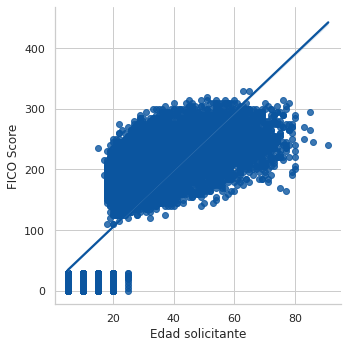

In [ ]:
sns.lmplot(x='female_age_mean', y='rent_mean', data=df[df['female_age_mean'] < 200000]);